# TripAdvisor Review Data: Preprocessing & Exploratory Data Analysis

This notebook covers text normalization, tokenization, statistical analysis, and visualization for the TripAdvisor review dataset.

In [3]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import nltk

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lucasduport/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lucasduport/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Load Dataset

In [4]:
ds = load_dataset('jniimi/tripadvisor-review-rating')
df = pd.DataFrame(ds['train'])
df = df.dropna(subset=['text', 'overall'])
df = df.reset_index(drop=True)
df[['text', 'overall']].head()

,text,overall
0,Stayed here on business trips and the hotel is...,5.0
1,Spent two nights here for a wedding in Brookly...,5.0
2,Great place for a 3-night stay. Our king room ...,5.0
3,"This is my favorite hotel in Chicago, and I've...",5.0
4,BEST. BREAKFAST. EVER. Couldn't have been happ...,5.0


## Text Normalization

- Lowercasing
- Remove punctuation and digits

In [5]:
def normalize_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['norm_text'] = df['text'].apply(normalize_text)
df['norm_text'].head()

0    stayed here on business trips and the hotel is...
1    spent two nights here for a wedding in brookly...
2    great place for a night stay our king room ove...
3    this is my favorite hotel in chicago and ive s...
4    best breakfast ever couldnt have been happier ...
Name: norm_text, dtype: object

## Tokenization

Using NLTK's `word_tokenize`.

In [6]:
stop_words = set(stopwords.words('english'))

def tokenize(text):
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words]
    return tokens

df['tokens'] = df['norm_text'].apply(tokenize)
df['tokens'].head()

0    [stayed, business, trips, hotel, excellent, bu...
1    [spent, two, nights, wedding, brooklyn, staff,...
2    [great, place, night, stay, king, room, overlo...
3    [favorite, hotel, chicago, ive, stayed, top, l...
4    [best, breakfast, ever, couldnt, happier, food...
Name: tokens, dtype: object

## Statistical Analysis

In [7]:
num_docs = len(df)
token_counts = df['tokens'].apply(len)
vocab = set([t for tokens in df['tokens'] for t in tokens])
vocab_size = len(vocab)
class_dist = df['overall'].value_counts().sort_index()

print(f'Number of documents: {num_docs}')
print(f'Vocabulary size: {vocab_size}')
print('Class distribution:')
print(class_dist)

Number of documents: 201295
Vocabulary size: 168577
Class distribution:
overall
1.0     8045
2.0    10786
3.0    28216
4.0    67732
5.0    86516
Name: count, dtype: int64


## Token Length Histogram

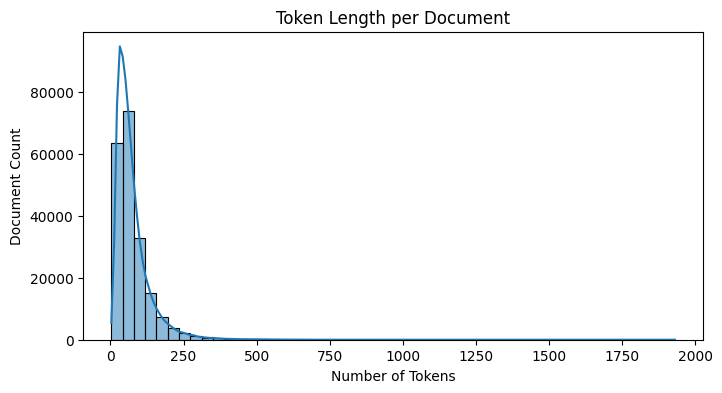

In [8]:
plt.figure(figsize=(8,4))
sns.histplot(token_counts, bins=50, kde=True)
plt.title('Token Length per Document')
plt.xlabel('Number of Tokens')
plt.ylabel('Document Count')
plt.show()

## Word Cloud Visualization

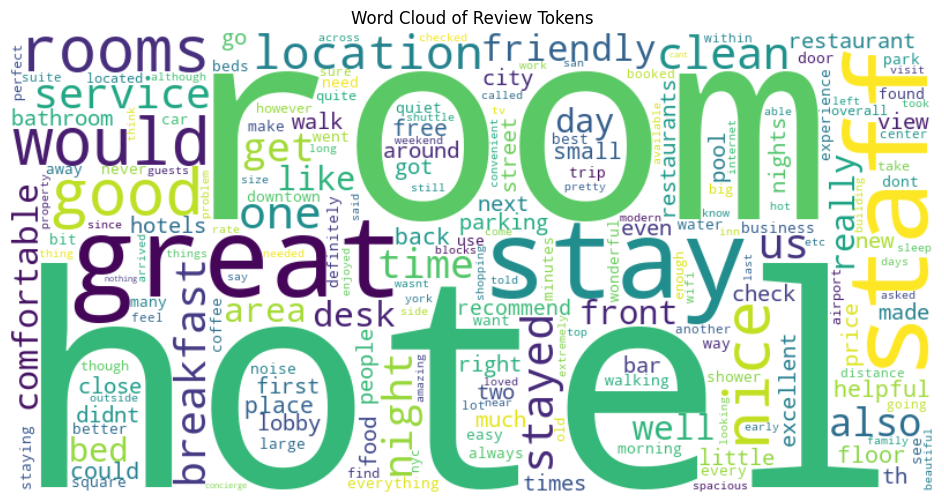

In [9]:
all_tokens = [t for tokens in df['tokens'] for t in tokens]
word_freq = Counter(all_tokens)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Tokens')
plt.show()